# Ordered Logit Model

In [1]:
import pandas  as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
import biogeme.distributions as dist
from biogeme.expressions import Beta, DefineVariable, log, Elem
import seaborn as sns
import matplotlib.pyplot as plt

**Import data**

In [2]:
pandas = pd.read_excel("data/BDA-Despistes_DCM_AE_V5.xlsx")
pandas = pandas[pandas['WEIGHT'].notna()]
pandas['Hora'] = pandas['Hora'].str.replace(':','')
pandas['Hora'] = pandas['Hora'].astype('float')
pandas['WINTER'] = pandas['WINTER ']
pandas['TALUDE_VALETA'] = pandas['TALUDE+VALETA']
pandas = pandas[pandas['Hora'].notna()].reset_index()
database = db.Database("data/roadside", pandas)

## Let's see what this dataset has

In Portugal, injury crash severities are registered by the police
and categorised as a function of the victims’ stay in hospital and
outcome:
* A minor injury is registered when a victim requires hospital
treatment but stays there for less than 24 h;
* A severe injury refers to a victim who is registered as a hospital
in-patient and stays there for more than a day; and
* A fatality means a victim who dies as a consequence of crash
injuries within 30 days of occurrence of the crash.

Portuguese crash data structure allows for categorising ROR
accidents by driver injury severity and by the severity of the most
seriously injured occupant. Data was provided by the Guarda
Nacional Republicana (GNR), which is a police force responsible for
maintaining security and public order as well as protecting and
defending the population and their property. The GNR is also
responsible for road crash investigation and data collection.
Whenever an accident occurs GNR officers compile an accident
report that includes detailed information such as the injury
severity of each vehicle occupant, driver characteristics, factors
leading to the accident, weather conditions, and a sketch of the
accident scene.


Roque, C., et al., Detecting unforgiving roadside contributors through the severity analysis of ran-off-road
crashes. Accid. Anal. Prev. (2015), http://dx.doi.org/10.1016/j.aap.2015.02.012

![](img/swissmetro_var1.png)

![](img/swissmetro_var2.png)

In [3]:
pandas

,index,ID,CHOICE,CHOI_MAX,CHOICE3,CHOICE3_MAX,CHOICE_F,CHOICE_G,CHOICE_L,CHOICE_P,...,YOUNG,OLD,RAIN,PEAK1,PEAK2,PEAK_HOUR,AE,TALUDE+VALETA,WINTER,TALUDE_VALETA
0,1,2,3,3,2,2,0,0,1,0,...,0,0,0,0,1,1,1,0,0,0
1,2,3,4,3,3,2,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,3,4,3,3,2,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,5,3,3,2,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,6,3,3,2,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,921,922,4,3,3,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
886,922,923,4,3,3,2,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
887,923,924,2,2,1,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
888,924,925,3,3,2,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


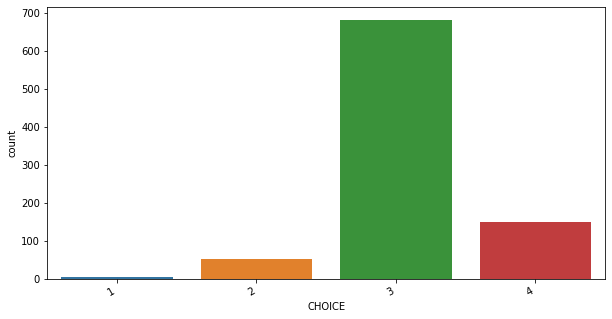

In [4]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['CHOICE'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
#chart.set_xticklabels(['Fatal', 'SeriousInjury', 'LightInjury', 'PDO']);

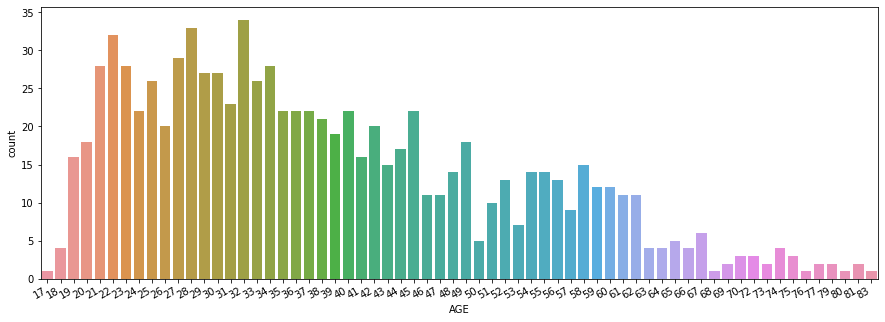

In [5]:
plt.figure(figsize=(15,5))
chart = sns.countplot(pandas['AGE'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

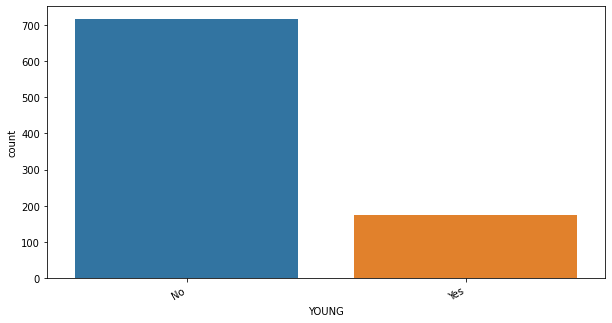

In [6]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['YOUNG'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

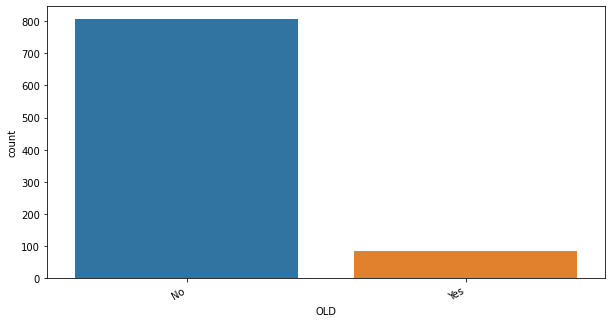

In [7]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['OLD'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

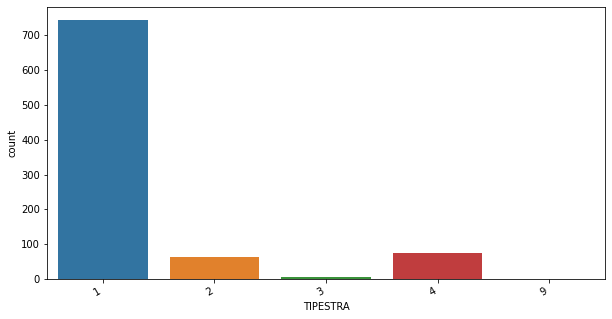

In [8]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['TIPESTRA'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
#chart.set_xticklabels(['Fatal', 'SeriousInjury', 'LightInjury', 'PDO']);

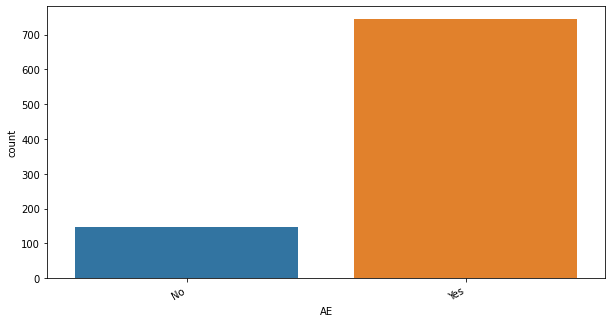

In [9]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['AE'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

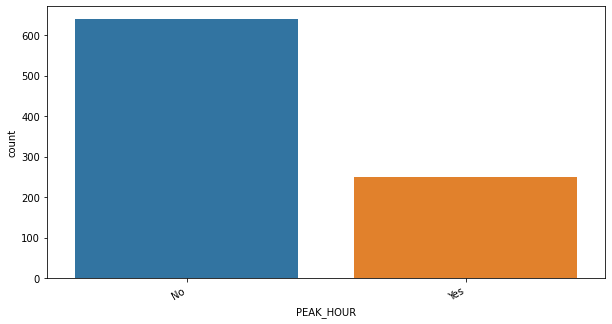

In [10]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['PEAK_HOUR'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

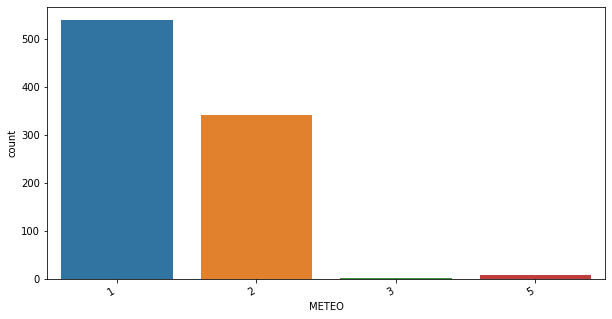

In [11]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['METEO'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
#chart.set_xticklabels(['Fatal', 'SeriousInjury', 'LightInjury', 'PDO']);

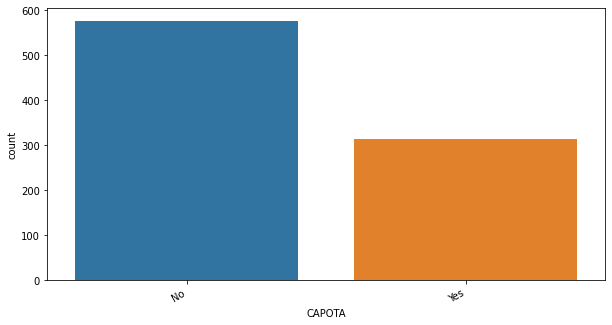

In [12]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['CAPOTA'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

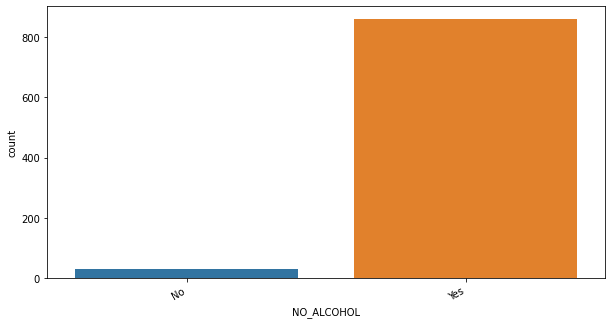

In [13]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['NO_ALCOHOL'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

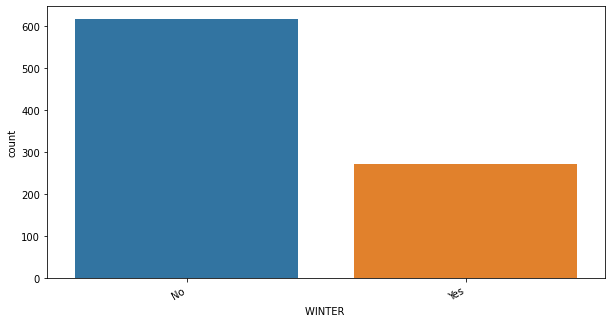

In [14]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['WINTER '])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);

**Use collumn names as variables**

In [15]:
globals().update(database.variables)

In [16]:
pandas = database.data

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pandas.describe()

,index,ID,CHOICE,CHOI_MAX,CHOICE3,CHOICE3_MAX,CHOICE_F,CHOICE_G,CHOICE_L,CHOICE_P,CHOICE_MF,CHOICE_MG,CHOICE_ML,CHOICE_MP,CHOICE3_FG,CHOICE3_L,CHOICE3_P,CHOICE3_MFG,CHOICE3_ML,CHOICE3_MP,GENDER,AGE,WEIGHT,Dia,mês,ano,DATE,WEEKDAY,DIAUTIL,Hora,Minuto,segundos,TIME,SUNRISE,SUNSET,NIGHT,TIPESTRA,FAIXA,METEO,ALINH,LVEL,VEL120,VEL90,LUMINO,TIPAC,NOBST,BARMET,BARRIG,TALUDE,VEDACA,VALETA,VEIC1,VEIC2,VEIC3,VEIC4,NOCUP,CAPOTA,NDEFV,TXALC,TXMUL,TXPRIS,NO_ALCOHOL,WINTER,SUMMER,YOUNG,OLD,RAIN,PEAK1,PEAK2,PEAK_HOUR,AE,TALUDE+VALETA,WINTER,TALUDE_VALETA
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,463.185393,464.185393,3.096629,2.914607,2.103371,1.923596,0.006742,0.058427,0.766292,0.168539,0.008989,0.082022,0.894382,0.014607,0.065169,0.766292,0.168539,0.091011,0.894382,0.014607,0.362921,38.522472,2.202382,15.664045,6.725843,2009.458427,40169.388764,3.844944,0.675281,12.384270,24.486517,0.0,0.532079,0.296597,0.799093,0.325843,1.347191,1.914607,1.423596,1.462921,259.773034,0.826966,0.008989,913.839326,16.008989,1.440449,0.359551,0.231461,0.115730,0.031461,0.028090,0.748315,0.187640,0.014607,0.002247,1.541573,0.352809,0.931461,0.051360,0.010112,0.020225,0.965169,0.306742,0.320225,0.196629,0.094382,0.383146,0.15618,0.125843,0.282022,0.835955,0.143820,0.306742,0.143820
std,267.464751,267.464751,0.494844,0.354165,0.472518,0.316058,0.081876,0.234681,0.423426,0.374555,0.094435,0.274553,0.307521,0.120040,0.246962,0.423426,0.374555,0.287787,0.307521,0.120040,0.481113,13.998797,0.614833,9.007468,3.604320,0.498549,204.867961,2.100566,0.468533,5.804907,17.649071,0.0,0.243611,0.022819,0.061079,0.468952,0.899767,0.279623,0.597430,0.741867,322.298997,0.378489,0.094435,278.861683,119.748264,0.675244,0.480139,0.422003,0.320081,0.174657,0.165323,0.434225,0.390644,0.120040,0.047378,0.829003,0.478113,1.639919,0.298132,0.100107,0.140847,0.183456,0.461400,0.466825,0.397673,0.292524,0.486427,0.36323,0.331858,0.450237,0.370525,0.351105,0.461400,0.351105
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.020000,1.000000,1.000000,2009.000000,39814.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.259722,0.718750,0.000000,1.000000,1.000000,1.000000,1.000000,50.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,233.250000,234.250000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,27.000000,2.000000,8.000000,4.000000,2009.000000,39996.250000,2.000000,0.000000,8.000000,10.000000,0.0,0.357639,0.276389,0.733333,0.000000,1.000000,2.000000,1.000000,1.000000,120.000000,1.000000,0.000000,999.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0

**Create parameters to be estimated**

In [18]:
tau1 = Beta('tau1', -1, None, 0, 0)

delta2 = Beta('delta2', 1, 0, None, 0)
tau2 = tau1 + delta2

delta3 = Beta('delta3', 2, 0, None, 0)
tau3 = tau2 + delta3

B_ROLLOVER = Beta('B_ROLLOVER', 0, None, None, 0)
B_SPEEDLIMIT120 = Beta('B_SPEEDLIMIT120', 0, None, None, 0)

**Define the utility function**

\begin{align}
V & = \beta_{rollover}X_{rollover}} + \beta_{120}X_{120} \\
\end{align}

In [19]:
U = B_ROLLOVER * CAPOTA + B_SPEEDLIMIT120 * VEL120

**Associate utility functions with choice probabilities**


In [20]:
ChoiceProba = {
    1: 1 - dist.logisticcdf(U - tau1),
    2: dist.logisticcdf(U - tau1) - dist.logisticcdf(U - tau2),
    3: dist.logisticcdf(U - tau2) - dist.logisticcdf(U - tau3),
    4: dist.logisticcdf(U - tau3)}

**Define the model**

In [21]:
logprob = log(Elem(ChoiceProba, CHOICE))

**Define the Biogeme object**

In [22]:
biogeme  = bio.BIOGEME(database, logprob, removeUnusedVariables=False)

biogeme.modelName = "roadside_ordered"

**Estimate the model**

In [23]:
biogeme.generateHtml = True
biogeme.generatePickle = False

results = biogeme.estimate()

print(f"HTML file:    {results.data.htmlFileName}")
print(f"Pickle file:  {results.data.pickleFileName }")

HTML file:    roadside_ordered~06.html
Pickle file:  None


**Print results**

In [24]:
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                    Value   Std err     t-test       p-value  Rob. Std err  Rob. t-test  Rob. p-value
B_ROLLOVER      -0.811606  0.176468  -4.599154  4.242093e-06      0.176113    -4.608434  4.057138e-06
B_SPEEDLIMIT120 -0.119254  0.205153  -0.581293  5.610429e-01      0.195180    -0.610995  5.412030e-01
delta2           2.340009  0.389813   6.002897  1.938280e-09      0.389365     6.009803  1.857487e-09
delta3           4.377749  0.161946  27.032181  0.000000e+00      0.161973    27.027582  0.000000e+00
tau1            -5.457001  0.453228 -12.040298  0.000000e+00      0.435426   -12.532565  0.000000e+00


In [25]:
gs = results.getGeneralStatistics()

for k,v in gs.items():
    print("{}= {}".format(k.ljust(45),v[0]))

Number of estimated parameters               = 5
Sample size                                  = 890
Excluded observations                        = 0
Init log likelihood                          = -1061.5663994215017
Final log likelihood                         = -614.8420363957916
Likelihood ratio test for the init. model    = 893.4487260514202
Rho-square for the init. model               = 0.4208162233367141
Rho-square-bar for the init. model           = 0.41610620236890206
Akaike Information Criterion                 = 1239.6840727915833
Bayesian Information Criterion               = 1263.6401801052143
Final gradient norm                          = 0.0029065761458367204
Nbr of threads                               = 8


## Let's build a second model, with more variables

In [26]:
B_WINTER = Beta('B_WINTER', 0, None, None, 0)
B_OLD = Beta('B_OLD', 0, None, None, 0)
B_YOUNG = Beta('B_YOUNG', 0, None, None, 0)
B_RAIN = Beta('B_RAIN', 0, None, None, 0)
B_AE = Beta('B_AE', 0, None, None, 0)
B_NO_ALCOHOL = Beta('B_NO_ALCOHOL', 0, None, None, 0)
B_SPEEDLIMIT90 = Beta('B_SPEEDLIMIT90', 0, None, None, 0)
B_TALUDE_VALETA = Beta('B_TALUDE_VALETA', 0, None, None, 0)

In [27]:
U = B_ROLLOVER * CAPOTA + \
    B_SPEEDLIMIT120 * VEL120 + \
    B_SPEEDLIMIT90 * VEL90 + \
    B_WINTER * WINTER + \
    B_OLD * OLD + \
    B_YOUNG * YOUNG + \
    B_RAIN * RAIN + \
    B_AE * AE + \
    B_NO_ALCOHOL * NO_ALCOHOL + \
    B_TALUDE_VALETA * TALUDE_VALETA 

In [28]:
ChoiceProba = {
    1: 1 - dist.logisticcdf(U - tau1),
    2: dist.logisticcdf(U - tau1) - dist.logisticcdf(U - tau2),
    3: dist.logisticcdf(U - tau2) - dist.logisticcdf(U - tau3),
    4: dist.logisticcdf(U - tau3)}

In [29]:
logprob = log(Elem(ChoiceProba, CHOICE))

In [30]:
biogeme  = bio.BIOGEME(database, logprob, removeUnusedVariables=False)

biogeme.modelName = "roadside_ordered"

In [31]:
biogeme.generateHtml = True
biogeme.generatePickle = False

results = biogeme.estimate()

print(f"HTML file:    {results.data.htmlFileName}")
print(f"Pickle file:  {results.data.pickleFileName }")

HTML file:    roadside_ordered~07.html
Pickle file:  None


In [32]:
pandasResults = results.getEstimatedParameters()
pandasResults

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
B_AE,-2.804544,1.385569,-2.024109,4.295891e-02,1.205453,-2.326547,1.998938e-02
B_NO_ALCOHOL,0.089008,0.445765,0.199674,8.417356e-01,0.489613,0.181792,8.557460e-01
B_OLD,0.238587,0.270444,0.882204,3.776667e-01,0.294924,0.808979,4.185271e-01
B_RAIN,0.114333,0.173732,0.658103,5.104721e-01,0.169951,0.672743,5.011107e-01
B_ROLLOVER,-0.814045,0.178774,-4.553479,5.276605e-06,0.178241,-4.567099,4.945208e-06
B_SPEEDLIMIT120,2.676493,1.386086,1.930972,5.348646e-02,1.207666,2.216253,2.667420e-02
B_SPEEDLIMIT90,1.895840,1.406187,1.348213,1.775898e-01,1.228578,1.543117,1.228024e-01
B_TALUDE_VALETA,-0.132874,0.230832,-0.575633,5.648633e-01,0.226779,-0.585919,5.579297e-01
B_WINTER,0.303483,0.180408,1.682202,9.252964e-02,0.176858,1.715967,8.616805e-02
B_YOUNG,0.010284,0.200436,0.051307,9.590805e-01,0.178488,0.057616,9.540542e-01


In [33]:
gs = results.getGeneralStatistics()

for k,v in gs.items():
    print("{}= {}".format(k.ljust(45),v[0]))

Number of estimated parameters               = 13
Sample size                                  = 890
Excluded observations                        = 0
Init log likelihood                          = -1061.5663994215017
Final log likelihood                         = -610.1374173509528
Likelihood ratio test for the init. model    = 902.8579641410979
Rho-square for the init. model               = 0.42524799420606585
Rho-square-bar for the init. model           = 0.4130019396897545
Akaike Information Criterion                 = 1246.2748347019055
Bayesian Information Criterion               = 1308.560713717346
Final gradient norm                          = 0.002452270583563102
Nbr of threads                               = 8
